In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# upload dataset

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dazahd","key":"8b9c14fada7494481948157e719babce"}'}

In [5]:
!mkdir ~/.kaggle

In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 /root/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c shai-club

  0% 0.00/865k [00:00<?, ?B/s]
100% 865k/865k [00:00<00:00, 107MB/s]


In [9]:
!unzip shai-club.zip

Archive:  shai-club.zip
  inflating: test.csv                
  inflating: train.csv               


In [10]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [11]:
train_data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [13]:
train_data.describe()

,Id,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,21576.500000,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,12457.053745,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10788.750000,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,21576.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,32364.250000,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [14]:
train_data['cut'].value_counts()

Ideal        17203
Premium      11113
Very Good     9658
Good          3881
Fair          1297
Name: cut, dtype: int64

In [15]:
train_data['color'].value_counts()

G    9060
E    7832
F    7633
H    6651
D    5421
I    4265
J    2290
Name: color, dtype: int64

In [16]:
train_data['clarity'].value_counts()

SI1     10428
VS2      9824
SI2      7432
VS1      6475
VVS2     4041
VVS1     2904
IF       1442
I1        606
Name: clarity, dtype: int64

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Visulaization and Preprocessing data

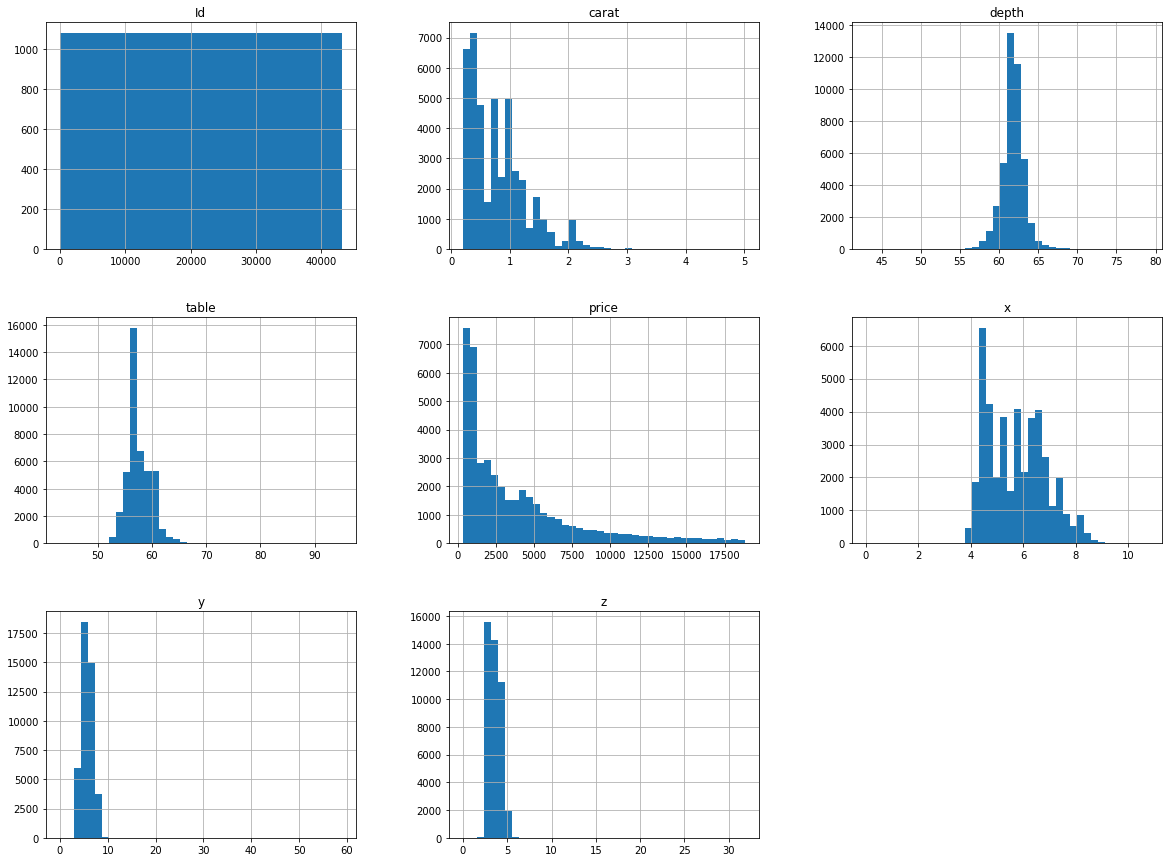

In [18]:
train_data.hist(bins = 40, figsize = (20,15))
plt.show()

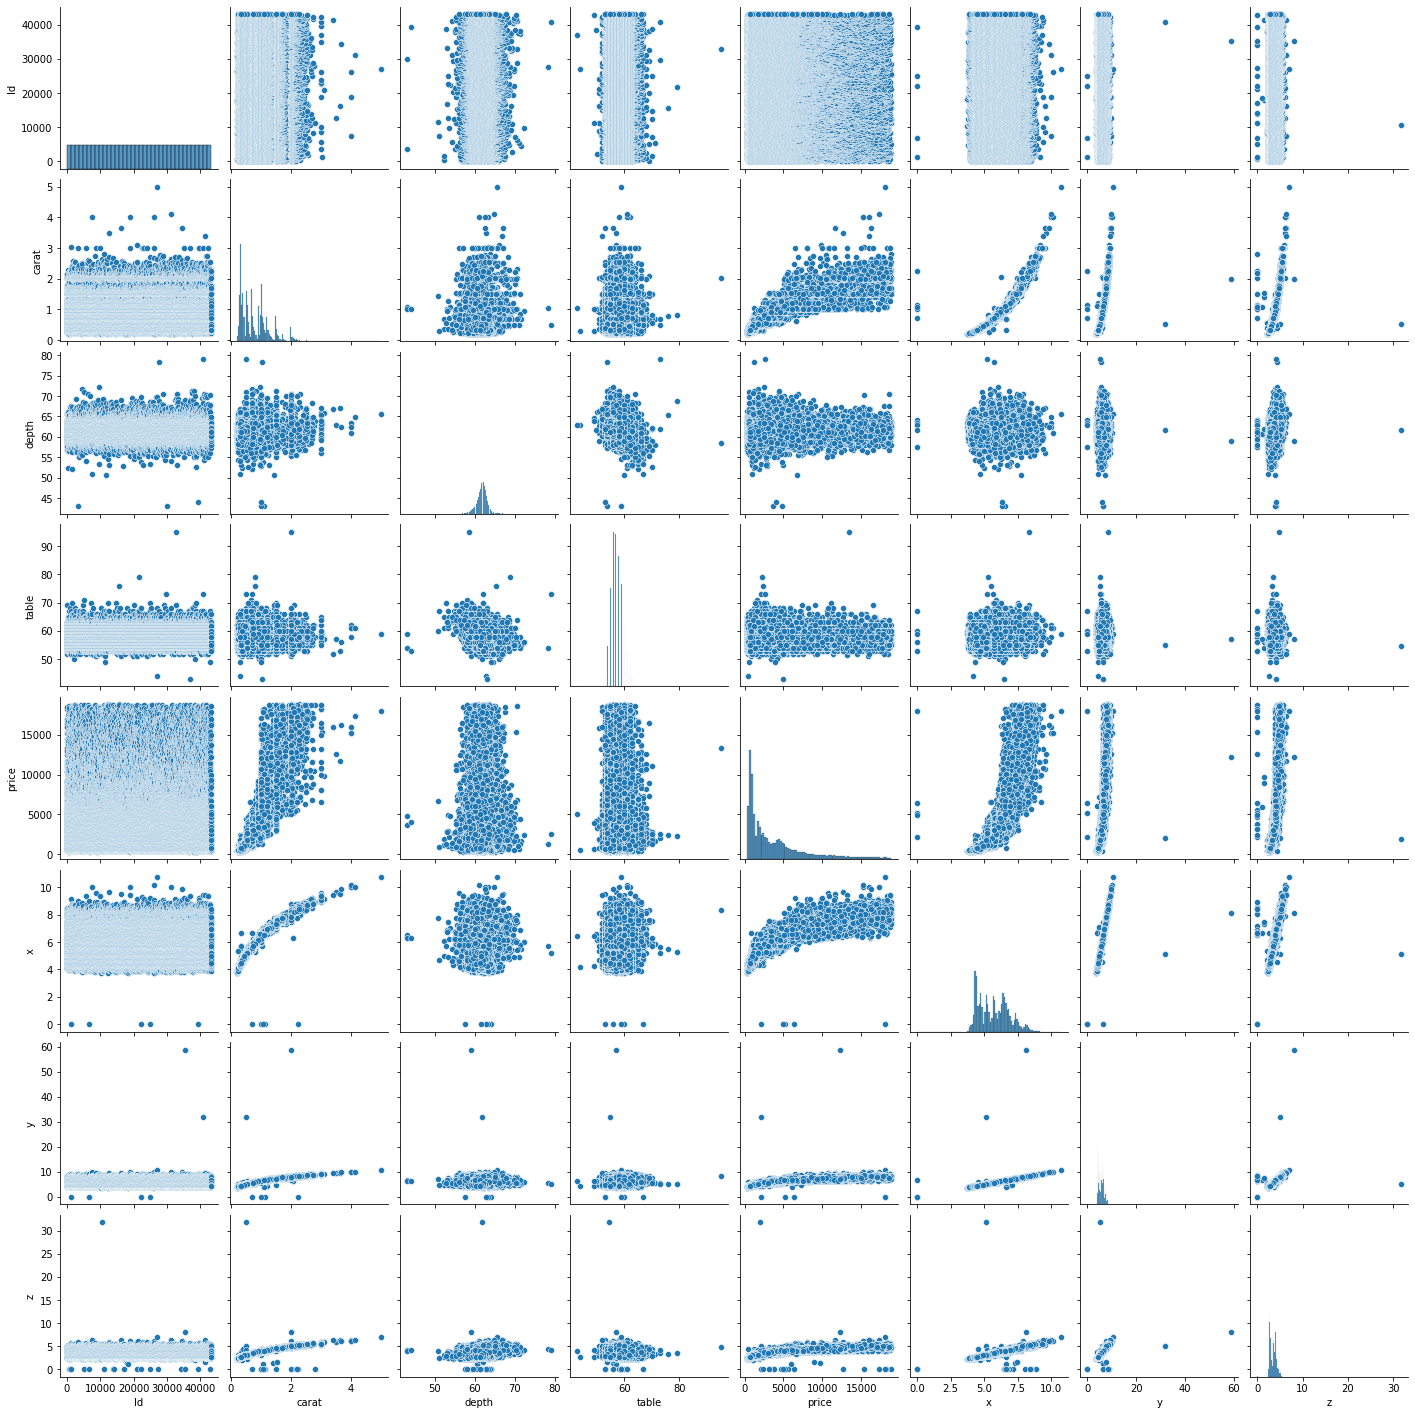

In [19]:
ans =sns.pairplot(train_data)

In [20]:
corr_matrix = train_data.corr()
corr_matrix

,Id,carat,depth,table,price,x,y,z
Id,1.000000,0.001141,-0.000776,-0.000739,-0.001111,-0.000519,0.001660,-0.000981
carat,0.001141,1.000000,0.023944,0.182889,0.921911,0.975760,0.947060,0.948923
depth,-0.000776,0.023944,1.000000,-0.302794,-0.013137,-0.029601,-0.033354,0.090834
table,-0.000739,0.182889,-0.302794,1.000000,0.128501,0.197342,0.184310,0.150746
price,-0.001111,0.921911,-0.013137,0.128501,1.000000,0.885181,0.861354,0.857665
x,-0.000519,0.975760,-0.029601,0.197342,0.885181,1.000000,0.968954,0.965677
y,0.001660,0.947060,-0.033354,0.184310,0.861354,0.968954,1.000000,0.942670
z,-0.000981,0.948923,0.090834,0.150746,0.857665,0.965677,0.942670,1.000000


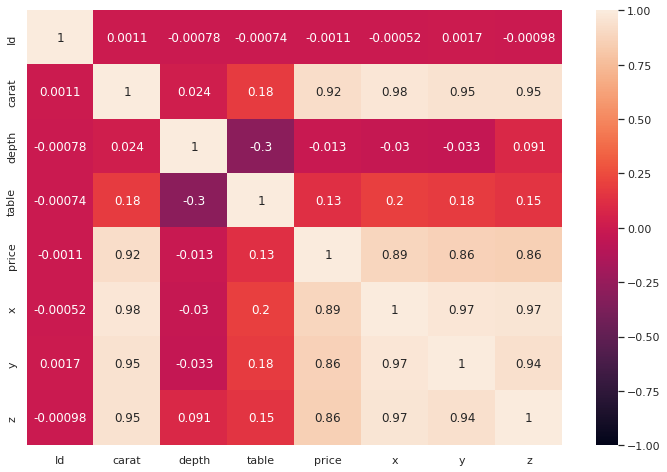

In [21]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(train_data.corr(), vmin = -1, vmax = +1, annot = True )

In [22]:
train_data.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [23]:
print("Number of rows with x == 0: {} ".format((train_data.x==0).sum()))
print("Number of rows with y == 0: {} ".format((train_data.y==0).sum()))
print("Number of rows with z == 0: {} ".format((train_data.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((train_data.depth==0).sum()))

Number of rows with x == 0: 5 
Number of rows with y == 0: 4 
Number of rows with z == 0: 17 
Number of rows with depth == 0: 0 


In [24]:
train_data[['x','y','z']] = train_data[['x','y','z']].replace(0,np.NaN)

In [25]:
train_data.isnull().sum()

Id          0
carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           5
y           4
z          17
dtype: int64

In [26]:
train_data.dropna(inplace=True)

In [27]:
train_data.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [28]:
train_data.shape

(43135, 11)

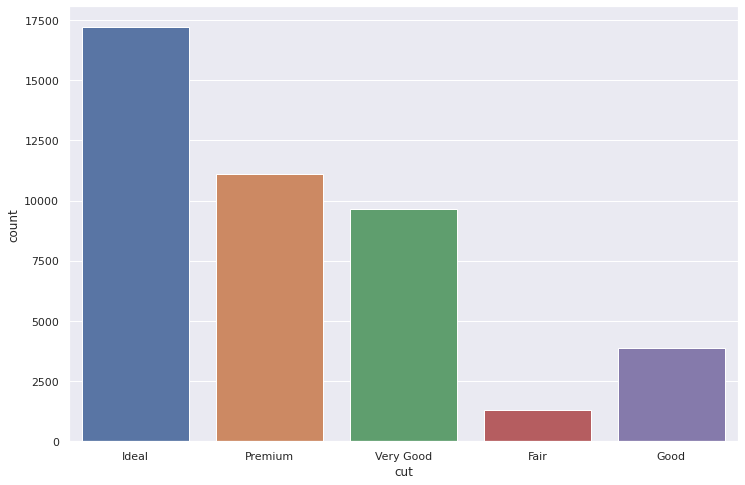

In [29]:
ans = sns.countplot(data = train_data,x = 'cut')

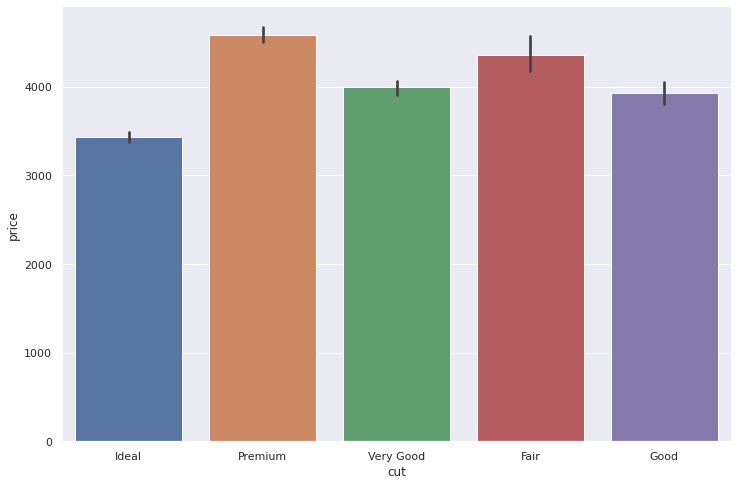

In [30]:
ans = sns.barplot(data = train_data, x ='cut', y='price')

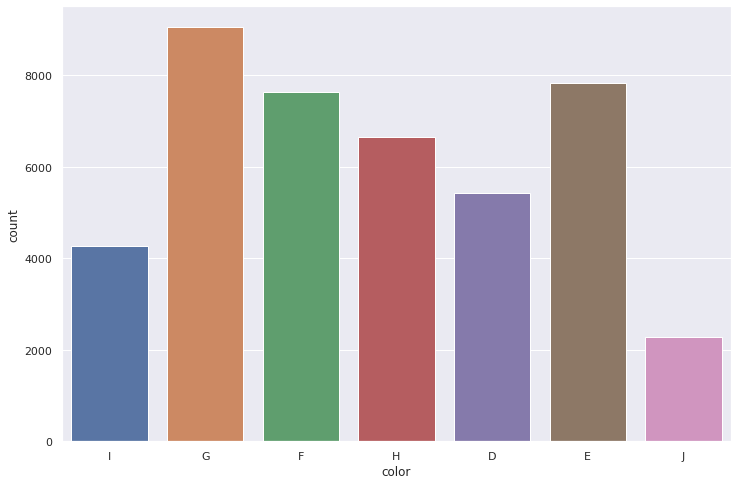

In [31]:
ans = sns.countplot(data = train_data,x = 'color')

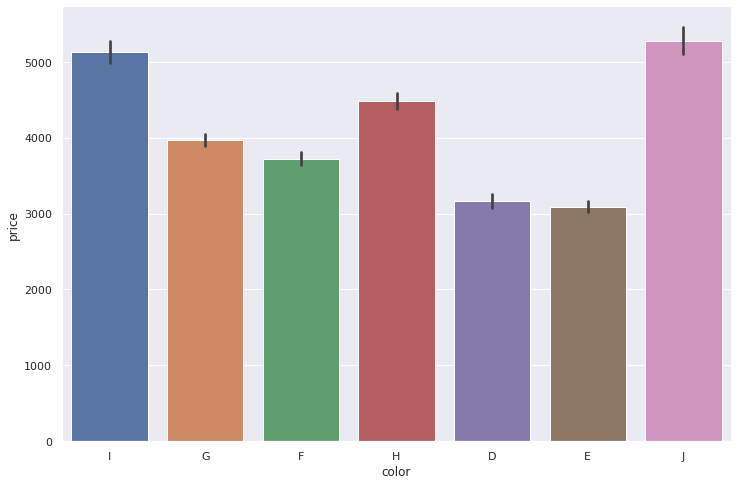

In [32]:
ans = sns.barplot(data = train_data, x ='color', y='price')

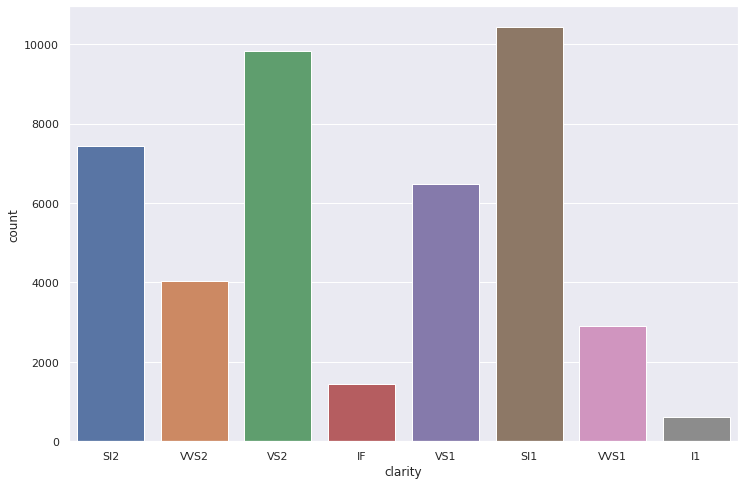

In [33]:
ans = sns.countplot(data = train_data,x = 'clarity')

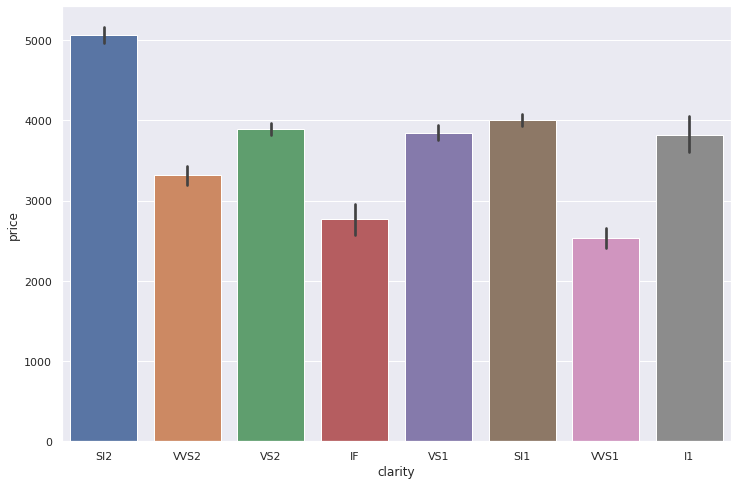

In [34]:
ans = sns.barplot(data = train_data, x ='clarity', y='price')

In [35]:
train_data['space'] = train_data['x'] * train_data['y']
train_data['volume'] = train_data['x'] * train_data['y'] * train_data['z']

In [36]:
corr_matrix = train_data.corr()
corr_matrix["price"].sort_values(ascending=False)

price     1.000000
carat     0.921872
space     0.900098
volume    0.899816
x         0.887172
z         0.864861
y         0.862936
table     0.128571
Id       -0.001075
depth    -0.013225
Name: price, dtype: float64

In [37]:
train_data.drop(['x','y','z','Id'], axis = 1, inplace = True)

In [38]:
one_hot_encoders_train_data =  pd.get_dummies(train_data)
cols = one_hot_encoders_train_data.columns
train_clean_data = pd.DataFrame(one_hot_encoders_train_data,columns= cols)
train_clean_data.head()

,carat,depth,table,price,space,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.06,61.8,57.0,4270,43.3620,176.483340,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,1.51,60.9,58.0,15164,54.7596,246.965796,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.32,61.3,56.0,828,19.5363,52.943373,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.53,61.2,56.0,1577,27.0918,86.422842,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.70,61.0,57.0,2596,32.9472,115.315200,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(train_clean_data[['carat','depth','table','space','volume']]),
                           columns=['carat','depth','table','space','volume'],
                           index=train_clean_data.index)


train_clean_data_standard = train_clean_data.copy(deep=True)
train_clean_data_standard[['carat','depth','table','space','volume']] = numericals[['carat','depth','table','space','volume']]
train_clean_data_standard.head()

,carat,depth,table,price,space,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.554429,0.036663,-0.205037,4270,0.683831,0.592663,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,1.505160,-0.590482,0.242716,15164,1.526856,1.489459,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,-1.008997,-0.311751,-0.652790,828,-1.078441,-0.979218,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.565322,-0.381434,-0.652790,1577,-0.519598,-0.553236,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.206157,-0.520800,-0.205037,2596,-0.086502,-0.185620,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


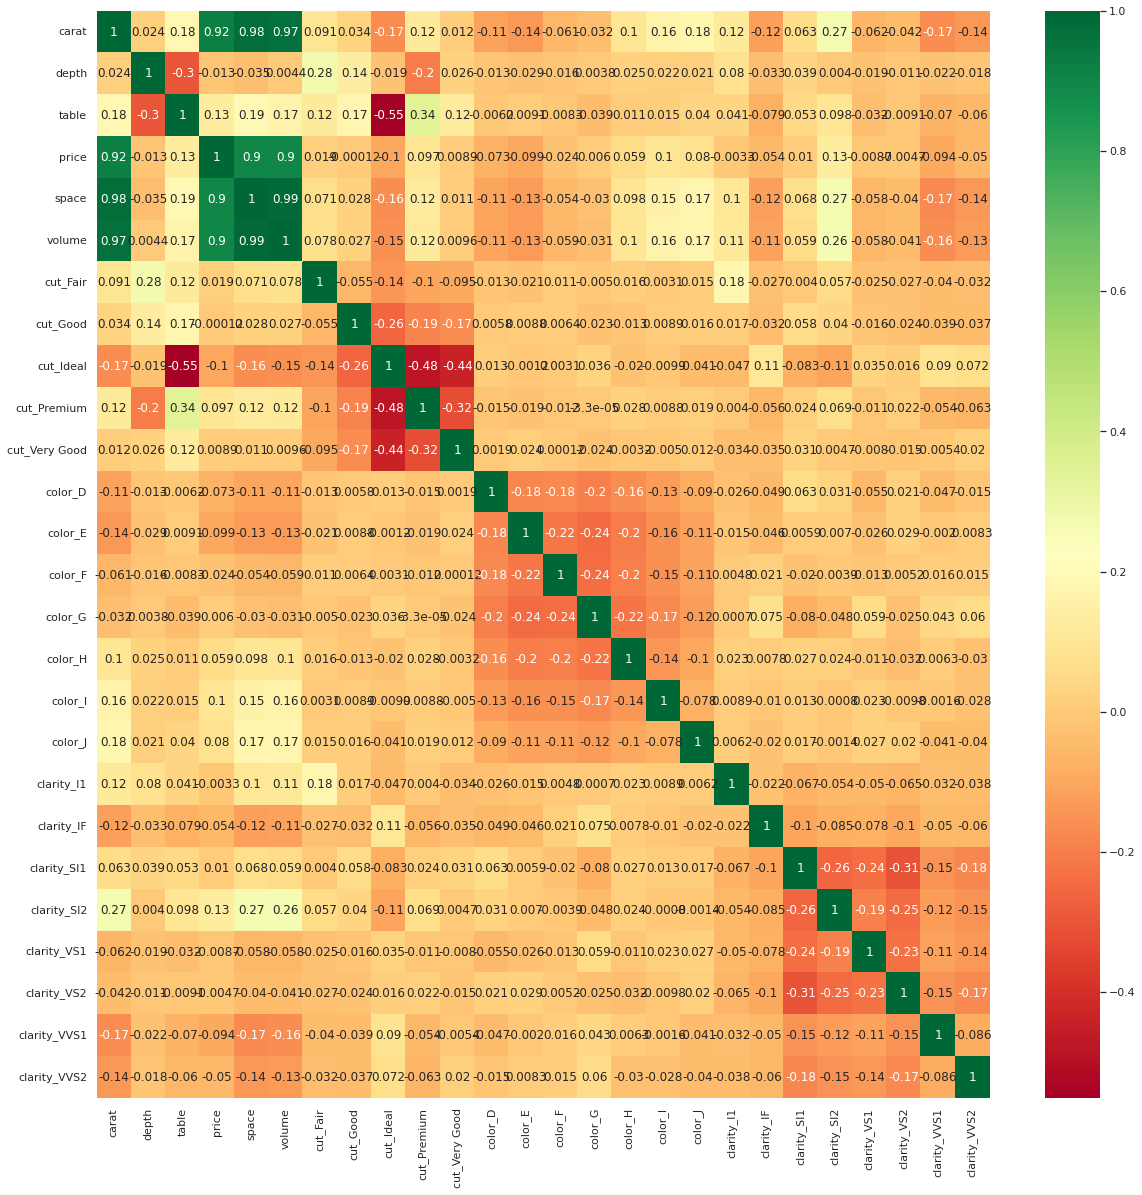

In [40]:
plt.figure(figsize=(20,20)) 
p=sns.heatmap(train_clean_data_standard.corr(), annot=True,cmap='RdYlGn')

In [41]:
X_train = train_clean_data_standard.drop(["price"],axis=1)
Y_train = train_clean_data_standard.price

# Preprocessing Test data

In [42]:
test_data['space'] = test_data['x'] * test_data['y']
test_data['volume'] = test_data['x'] * test_data['y'] * test_data['z']
test_data.drop(['x','y','z'], axis = 1, inplace = True)

one_hot_encoders_test_data =  pd.get_dummies(test_data)
cols = one_hot_encoders_test_data.columns
test_clean_data = pd.DataFrame(one_hot_encoders_test_data,columns= cols)

numericals =  pd.DataFrame(sc_X.transform(test_clean_data[['carat','depth','table','space','volume']]),
                           columns=['carat','depth','table','space','volume'],
                           index=test_clean_data.index)

test_clean_data_standard = test_clean_data.copy(deep=True)
test_clean_data_standard[['carat','depth','table','space','volume']] = numericals[['carat','depth','table','space','volume']]
X_test = test_clean_data_standard
X_test.head()

,Id,carat,depth,table,space,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,-0.966742,-0.451117,-0.205037,-1.025682,-0.944317,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,-0.185029,0.663808,0.242716,-0.111946,-0.167752,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,-0.755469,0.733491,-0.652790,-0.780058,-0.738151,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,4,0.026244,-1.147945,0.690468,0.192754,0.052601,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,-0.839978,-0.381434,-0.652790,-0.840592,-0.807544,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# Model Training

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
Y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(Y_train, Y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1132.0462948274894


In [44]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(X_train,Y_train)
Y_pred = tree_reg.predict(X_train)
tree_mse = mean_squared_error(Y_train,Y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

33.88156555599708

In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, Y_train, scoring ="neg_mean_squared_error",cv = 10)
tree_rmse_scores = np.sqrt(-scores)
print("Scores: ", tree_rmse_scores)
print("Mean: ", tree_rmse_scores.mean())
print("Standard Deviation: ", tree_rmse_scores.std())

Scores:  [743.49401782 746.27116464 744.27932347 730.52767659 747.42893329
 725.25409102 753.06139673 697.04261651 697.75360703 794.0508814 ]
Mean:  737.9163708500575
Standard Deviation:  26.666423352170238


In [46]:
scores = cross_val_score(lin_reg, X_train, Y_train, scoring ="neg_mean_squared_error",cv = 10)
lin_rmse_scores = np.sqrt(-scores)
print("Scores: ", lin_rmse_scores)
print("Mean: ", lin_rmse_scores.mean())
print("Standard Deviation: ", lin_rmse_scores.std())

Scores:  [1114.10634339 1113.95026453 1194.05272749 1106.4743273  1154.98615806
 1129.98329758 1182.28363663 1103.08427525 1176.51585027 1127.77214167]
Mean:  1140.320902217822
Standard Deviation:  32.174884972525675


In [56]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,Y_train)
forest_scores = cross_val_score(forest_reg, X_train, Y_train ,scoring = "neg_mean_squared_error", cv = 20)
forest_rmse_scores = np.sqrt(-forest_scores)
print("Scores: ", forest_rmse_scores)
print("Mean: ", forest_rmse_scores.mean())
print("Standard Deviation: ", forest_rmse_scores.std())

Scores:  [540.47681363 617.23075554 530.5806158  543.13425845 571.92121461
 592.63197535 560.72263181 526.33598986 580.05447183 531.91631378
 528.63042902 557.84206171 540.46456099 557.17557474 492.13854543
 572.60512115 536.00211618 520.49278658 648.60633224 560.40012988]
Mean:  555.468134928358
Standard Deviation:  34.68261803830821


In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'n_estimators': [60,70,80], 'max_features':[8,19,21]},
              {'bootstrap':[False], 'max_features':[8,19,21],'n_estimators':[70,80]}
]
forest_reg = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(forest_reg,param_grid,cv = 15, scoring = 'neg_mean_squared_error',return_train_score = True)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=15, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [8, 19, 21],
                          'n_estimators': [60, 70, 80]},
                         {'bootstrap': [False], 'max_features': [8, 19, 21],
                          'n_estimators': [70, 80]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [49]:
grid_search.best_params_

{'max_features': 19, 'n_estimators': 80}

In [50]:
grid_search.best_estimator_

RandomForestRegressor(max_features=19, n_estimators=80, random_state=42)

In [51]:
cvres = grid_search.cv_results_

In [52]:
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
  print(np.sqrt(-mean_score), params)

557.5128270324612 {'max_features': 8, 'n_estimators': 60}
556.4080128088468 {'max_features': 8, 'n_estimators': 70}
555.4612376988341 {'max_features': 8, 'n_estimators': 80}
553.5652095942136 {'max_features': 19, 'n_estimators': 60}
552.6524647708361 {'max_features': 19, 'n_estimators': 70}
552.2973778668539 {'max_features': 19, 'n_estimators': 80}
555.2838958857434 {'max_features': 21, 'n_estimators': 60}
554.5691333730394 {'max_features': 21, 'n_estimators': 70}
554.3064737811103 {'max_features': 21, 'n_estimators': 80}
557.1189155140795 {'bootstrap': False, 'max_features': 8, 'n_estimators': 70}
556.9420245311376 {'bootstrap': False, 'max_features': 8, 'n_estimators': 80}
586.5149626840516 {'bootstrap': False, 'max_features': 19, 'n_estimators': 70}
586.5970569504075 {'bootstrap': False, 'max_features': 19, 'n_estimators': 80}
605.8603616516889 {'bootstrap': False, 'max_features': 21, 'n_estimators': 70}
605.9485806304624 {'bootstrap': False, 'max_features': 21, 'n_estimators': 80}


In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# param_distribs = {
#         'n_estimators': np.random.randint(1, 200, 10),
#         'max_features': np.random.randint(1, 22, 10),
#     }

# forest_reg = RandomForestRegressor(random_state=42)
# rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
#                                 n_iter=10, cv=30, scoring='neg_mean_squared_error', random_state=42)
# rnd_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=30, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': array([19,  8, 20, 21, 21, 16, 13,  3, 20,  7]),
                                        'n_estimators': array([ 80, 102,  45,  20, 142,  33,  61,  19, 116,  11])},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
# import joblib
# joblib.dump(forest_reg, "forest_reg.pkl")


In [ ]:
# cvres = rnd_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)

558.3189636000927 {'n_estimators': 20, 'max_features': 20}
558.7179914803834 {'n_estimators': 20, 'max_features': 16}
597.8273963333942 {'n_estimators': 80, 'max_features': 3}
553.4361460740352 {'n_estimators': 33, 'max_features': 21}
549.187764833344 {'n_estimators': 142, 'max_features': 21}
570.1707660041801 {'n_estimators': 11, 'max_features': 21}
550.6061832432532 {'n_estimators': 45, 'max_features': 20}
549.5732040558465 {'n_estimators': 80, 'max_features': 20}
550.3350487083272 {'n_estimators': 80, 'max_features': 8}
548.3587649785351 {'n_estimators': 80, 'max_features': 19}


In [ ]:
# feature_importances = grid_search.best_estimator_.feature_importances_
# feature_importances

In [ ]:
# feature_importances = rnd_search.best_estimator_.feature_importances_
# feature_importances

array([2.13924500e-01, 4.09089183e-03, 2.43254530e-03, 1.67745468e-01,
       5.13471112e-01, 2.59983587e-04, 2.36545198e-04, 9.72850481e-04,
       4.37929109e-04, 3.44939793e-04, 2.90554904e-03, 1.71080350e-03,
       1.65274753e-03, 2.47371769e-03, 5.58787383e-03, 7.43585029e-03,
       1.05681317e-02, 1.46744845e-02, 2.70765518e-03, 1.23687628e-02,
       1.91318921e-02, 3.52384081e-03, 4.44701643e-03, 2.57760174e-03,
       4.31730854e-03])

In [ ]:
# joblib.dump(forest_reg, "rnd_search.best_estimator_.pkl")

In [62]:
X_testing = X_test.drop('Id',axis = 1)
id_test = X_test['Id'].copy()

final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_testing)
final_predictions

prediction = pd.Series(final_predictions)
data = { 'Id': id_test, 'Price': prediction }
pred = pd.DataFrame(data)
pred.to_csv('submissions.csv', index=False)

In [63]:
pred

,Id,Price
0,1,779.533333
1,2,3037.462500
2,3,924.775000
3,4,2749.450000
4,5,1102.735000
...,...,...
10783,10784,1837.687500
10784,10785,6567.225000
10785,10786,4681.787500
10786,10787,4603.152143
